In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

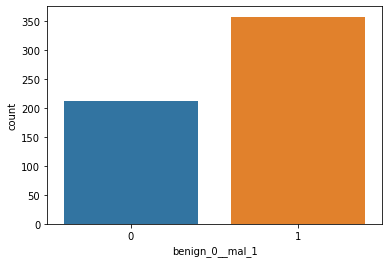

In [6]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

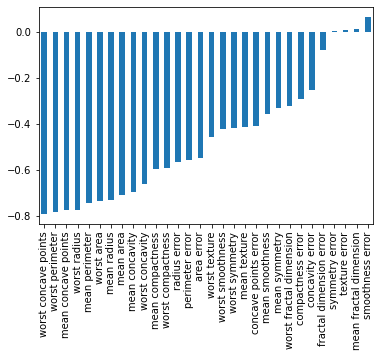

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

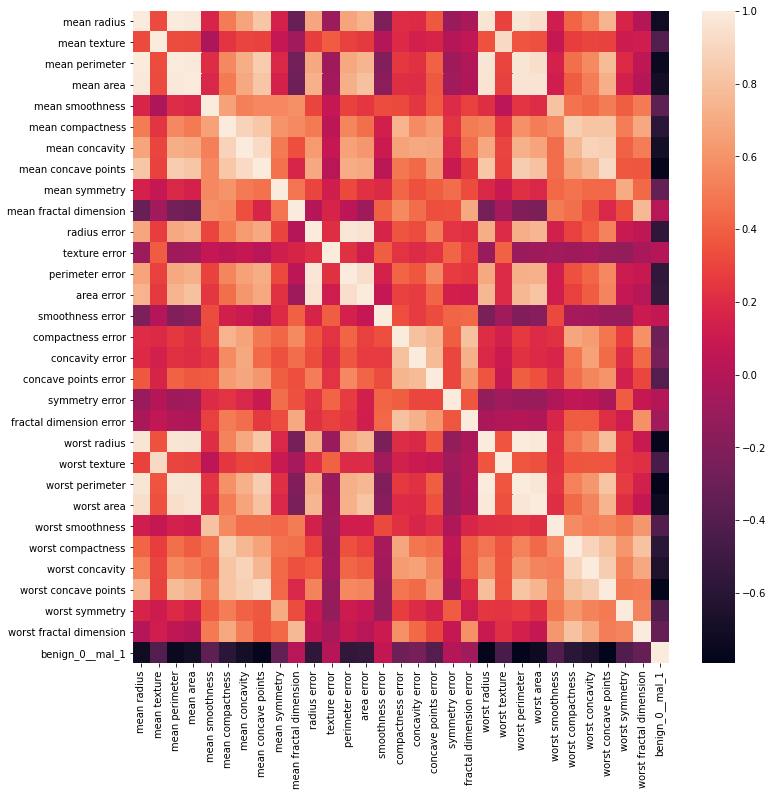

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1', axis = 1).values

In [12]:
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))

model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [23]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6484 - val_loss: 0.6290
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5995 - val_loss: 0.5842
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5559 - val_loss: 0.5397
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5111 - val_loss: 0.4928
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4645 - val_loss: 0.4455
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4203 - val_loss: 0.4005
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3818 - val_loss: 0.3605
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3457 - val_loss: 0.3265
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3154 - val_loss: 0.2964
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2900 - val_loss: 0.2676
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0591 - val_loss: 0.1011
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1001
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0525 - val_loss: 0.1065
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0526 - val_loss: 0.1025
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0512 - val_loss: 0.1041
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.1022
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1005
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1099
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0519 - val_loss: 0.1053
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0559 - val_loss: 0.1054
Epoch 93/600


14/14 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.1225
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.1159
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0403 - val_loss: 0.1338
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.1177
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0438 - val_loss: 0.1337
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.1158
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.1217
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0406 - val_loss: 0.1266
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.1209
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0401 - val_loss: 0.1180
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.1268
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.1298
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.1291
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.1313
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0298 - val_loss: 0.1309
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.1341
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0308 - val_loss: 0.1433
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.1313
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.1410
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.1329
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.1433
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1580
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1415
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.1519
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.1447
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.1632
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.1603
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.1480
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1516
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.1507
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.1615
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.1851
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.1685
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.1876
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.1671
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.1761
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1799
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1784
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.1895
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.1784
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.2132
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.1936
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.2062
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.2062
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.1980
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.2348
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.1950
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.2274
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.2028
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.2578
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.2586
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.2360
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.2458
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.2292
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.2701
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.2368
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2538
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.2504
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.2522
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2573
Epoc

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.648399,0.628994
1,0.599531,0.584197
2,0.555933,0.539744
3,0.511113,0.492816
4,0.464529,0.445515
...,...,...
595,0.005733,0.261361
596,0.005321,0.261296
597,0.005426,0.261927
598,0.006080,0.260444


<AxesSubplot:>

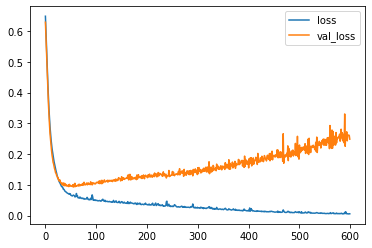

In [26]:
losses.plot()

In [27]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))

model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1,patience = 25)

In [31]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6843 - val_loss: 0.6696
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6523 - val_loss: 0.6384
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6025
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5797 - val_loss: 0.5615
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5382 - val_loss: 0.5151
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4927 - val_loss: 0.4676
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4413 - val_loss: 0.4188
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3951 - val_loss: 0.3716
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3552 - val_loss: 0.3302
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3199 - val_loss: 0.2939
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0548 - val_loss: 0.1021
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0548 - val_loss: 0.1029
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0553 - val_loss: 0.1019
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 0.1039
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.1031
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0549 - val_loss: 0.1090
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 0.1061
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0547 - val_loss: 0.1025
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0542 - val_loss: 0.1116
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0572 - val_loss: 0.0992
Epoch 93/600


<AxesSubplot:>

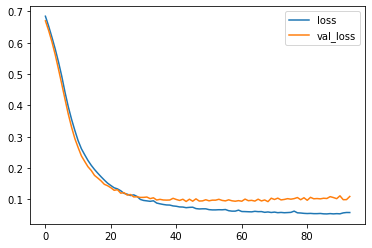

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [35]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7017 - val_loss: 0.6906
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6851 - val_loss: 0.6788
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6731 - val_loss: 0.6673
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6626 - val_loss: 0.6527
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6517 - val_loss: 0.6216
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.5927
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6131 - val_loss: 0.5688
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5974 - val_loss: 0.5512
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5727 - val_loss: 0.5245
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5458 - val_loss: 0.5019
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1311 - val_loss: 0.0875
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1286 - val_loss: 0.0976
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1298 - val_loss: 0.1021
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1380 - val_loss: 0.0985
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1229 - val_loss: 0.1000
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1258 - val_loss: 0.0908
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1131 - val_loss: 0.1022
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0867 - val_loss: 0.0911
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1042 - val_loss: 0.0985
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1159 - val_loss: 0.0999
Epoch 93/600


<AxesSubplot:>

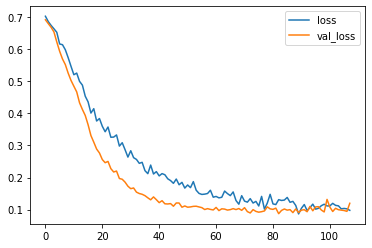

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [38]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [41]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
